## Introdução sobre o Projeto

###### xxxx

##### Etapa 1. Pré-Processamento dos Dados

In [4]:
# Importando bibliotecas

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.stats import zscore

In [5]:
# Evitar avisos do seaborn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# Lendo o arquivo Excel
# Pip install openpyxl

# URL do arquivo XLSX no GitHub
url = 'https://raw.githubusercontent.com/cesarabaraujo/projetoV_ifoodtech/main/Clean_Ads_Data.xlsx'

# Lê o conteúdo do arquivo no Pandas
df_1 = pd.read_excel(url)

# df_1 = pd.read_excel(r'C:\Users\cesar\Downloads\ifoodtech_moduloV\projeto\Clean_Ads_Data.xlsx')

In [7]:
# Visualizando as três primeiras linhas

df_1.head(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0


In [ ]:
# Visualizando as três últimas linhas

df_1.tail(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25855,2014-11-24-03,2014-11-24,3,Monday,Format2,728x90,Inter229,Video,Desktop,Display,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,2014-11-24-05,2014-11-24,5,Monday,Format2,728x90,Inter225,Video,Mobile,Display,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042
25857,2014-11-24-04,2014-11-24,4,Monday,Format2,728x90,Inter220,Web,Mobile,Video,2219556,1224363,1142647,1229,2036.80,0.35,1323.9200,0.001076,1.782528,1.657282


In [ ]:
# Visualizando as principais infos do dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25858 entries, 0 to 25857
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              25858 non-null  object        
 1   Date                   25858 non-null  datetime64[ns]
 2   Hour of Day            25858 non-null  int64         
 3   Date.1                 25858 non-null  object        
 4   InventoryType          25858 non-null  object        
 5   AD Size                25857 non-null  object        
 6   Ad Type                25858 non-null  object        
 7   Platform               25858 non-null  object        
 8   Device Type            25858 non-null  object        
 9   Format                 25858 non-null  object        
 10  Available_Impressions  25858 non-null  int64         
 11  Matched_Queries        25858 non-null  int64         
 12  Impressions            25858 non-null  int64         
 13  C

In [ ]:
# Selecionando dados qualitativos

df_1_qualitative = df_1.iloc[:,2:7]

df_1_qualitative

,Hour of Day,Date.1,InventoryType,AD Size,Ad Type
0,23,Monday,Format1,300x250,Inter228
1,18,Monday,Format7,300x600,Inter218
2,17,Monday,Format7,300x600,Inter222
3,20,Monday,Format1,300x250,Inter218
4,22,Monday,Format1,300x250,Inter222
...,...,...,...,...,...
25853,2,Monday,Format2,728x90,Inter221
25854,6,Monday,Format2,728x90,Inter226
25855,3,Monday,Format2,728x90,Inter229
25856,5,Monday,Format2,728x90,Inter225


In [ ]:
# Selecionando dados quantativos

df_1_quantitative = df_1.iloc[:,8:]

df_1_quantitative

,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,Mobile,Video,1911,336,334,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
1,Mobile,Display,1987,325,324,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
2,Desktop,Display,2375,434,428,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
3,Mobile,Display,2235,345,342,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
4,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.002817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
25853,Mobile,Display,3765357,2197060,2073627,2501,3822.17,0.33,2560.8539,0.001206,1.843229,1.528257
25854,Mobile,Display,4328962,2506395,2371296,3370,5150.49,0.30,3605.3430,0.001421,2.172015,1.528335
25855,Desktop,Display,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,Mobile,Display,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042


In [ ]:
# Principais estatísticas do dataframe - qualitativo

df_1_qualitative.describe()

,Hour of Day
count,25858.000000
mean,11.560407
std,6.915733
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,23.000000


In [ ]:
# Principais estatísticas do dataframe - quantitativo

df_1_quantitative.describe()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,2.585800e+04,2.585800e+04,2.585800e+04,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000
mean,2.170312e+06,1.155718e+06,1.107910e+06,9526.391252,2415.146152,0.336725,1717.072689,0.075019,7.524461,0.300359
std,4.543952e+06,2.408041e+06,2.327426e+06,16721.563722,3934.248083,0.030546,2994.152333,0.091288,8.928088,0.338831
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,9.133500e+03,5.451500e+03,2.559000e+03,305.000000,36.030000,0.350000,23.419500,0.002343,1.573372,0.078004
50%,3.310695e+05,1.895120e+05,1.621955e+05,3457.000000,1173.745000,0.350000,762.934250,0.007177,2.959644,0.118332
75%,2.208674e+06,1.008255e+06,9.499750e+05,10685.500000,2692.745000,0.350000,1750.284250,0.130617,12.448876,0.499956
max,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.177300,2.000000,715.000000,7.264000


In [ ]:
# Função para visualizar os valores únicos e nulos por colunas

def valores_unicos(df):
    for coluna in df.columns:
        print(f'Coluna {coluna}:')
        
        contar_valores = df[coluna].value_counts()
        porcentagem_valores = df[coluna].value_counts(normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem']).round(2)
        print(resultado_valores)

        print(f'Valores nulos: {df[coluna].isnull().sum()}')
        print('\n')

# Visualizando os valores 
        
valores_unicos(df_1)

Coluna Timestamp:
               Qnt  Porcentagem
2014-10-13-16   13         0.05
2014-10-28-23   13         0.05
2014-10-27-07   13         0.05
2014-10-27-01   13         0.05
2014-10-27-14   13         0.05
...            ...          ...
2014-09-04-01   11         0.04
2014-09-01-18   11         0.04
2014-09-04-22   11         0.04
2014-09-04-02   11         0.04
2014-09-01-16    9         0.03

[2018 rows x 2 columns]
Valores nulos: 0


Coluna Date:
            Qnt  Porcentagem
2014-10-19  312         1.21
2014-11-20  312         1.21
2014-11-19  312         1.21
2014-11-18  312         1.21
2014-11-17  312         1.21
...         ...          ...
2014-09-04  278         1.08
2014-09-03  278         1.08
2014-09-02  274         1.06
2014-11-24  247         0.96
2014-09-01   90         0.35

[85 rows x 2 columns]
Valores nulos: 0


Coluna Hour of Day:
     Qnt  Porcentagem
17  1096         4.24
18  1094         4.23
16  1093         4.23
20  1086         4.20
12  1086         4.20

In [8]:
# Verificando se há linhas duplicadas 

df_1.duplicated().sum()

0

In [9]:
# Criando uma coluna para mês

df_1['Month'] = df_1['Date'].dt.month


# Visualizando as três primeiras linhas 

df_1.head(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,...,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,...,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,...,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,...,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [10]:
# Substituir espaços e pontos por _ nos nomes das colunas

df_1.columns = df_1.columns.str.replace(' ', '_').str.replace('.', '_' )

# Visualizando as três primeiras linhas 

df_1.head(3)

,Timestamp,Date,Hour_of_Day,Date_1,InventoryType,AD_Size,Ad_Type,Platform,Device_Type,Format,...,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,...,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,...,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,...,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [ ]:
# Atualizando dados qualitativo e quantitativos após alterar estrutura do dataframe.

df_1_qualitative = pd.concat([df_1.iloc[:,2:7], df_1.iloc[:,-1]], axis=1)
df_1_qualitative

,Hour_of_Day,Date_1,InventoryType,AD_Size,Ad_Type,Month
0,23,Monday,Format1,300x250,Inter228,9
1,18,Monday,Format7,300x600,Inter218,9
2,17,Monday,Format7,300x600,Inter222,9
3,20,Monday,Format1,300x250,Inter218,9
4,22,Monday,Format1,300x250,Inter222,9
...,...,...,...,...,...,...
25853,2,Monday,Format2,728x90,Inter221,11
25854,6,Monday,Format2,728x90,Inter226,11
25855,3,Monday,Format2,728x90,Inter229,11
25856,5,Monday,Format2,728x90,Inter225,11


In [ ]:
# Selecionando colunas relevantes para variáveis quantitativas

df_1_quantitative = df_1.iloc[:,8:-1]
df_1_quantitative

,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,Mobile,Video,1911,336,334,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
1,Mobile,Display,1987,325,324,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
2,Desktop,Display,2375,434,428,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
3,Mobile,Display,2235,345,342,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
4,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.002817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
25853,Mobile,Display,3765357,2197060,2073627,2501,3822.17,0.33,2560.8539,0.001206,1.843229,1.528257
25854,Mobile,Display,4328962,2506395,2371296,3370,5150.49,0.30,3605.3430,0.001421,2.172015,1.528335
25855,Desktop,Display,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,Mobile,Display,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042


In [ ]:
# Visualizando colunas do df_1

print(df_1.columns)


Index(['Timestamp', 'Date', 'Hour_of_Day', 'Date_1', 'InventoryType',
       'AD_Size', 'Ad_Type', 'Platform', 'Device_Type', 'Format',
       'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC', 'Month'],
      dtype='object')


##### 2. Identificação e Tratamento de Outliers

In [11]:
# Criando uma cópia do Dataframe

df_2 = df_1.copy()

# Excluindo as colunas: Timestamp, InventoryType, Ad_Type e Ad_Size

colunas_excluidas = ["Timestamp", "InventoryType", "Ad_Type", "AD_Size"]
df_2.drop(colunas_excluidas, axis=1, inplace=True)

# Visualizando as três primeiras linhas

df_2.head(3)

,Date,Hour_of_Day,Date_1,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


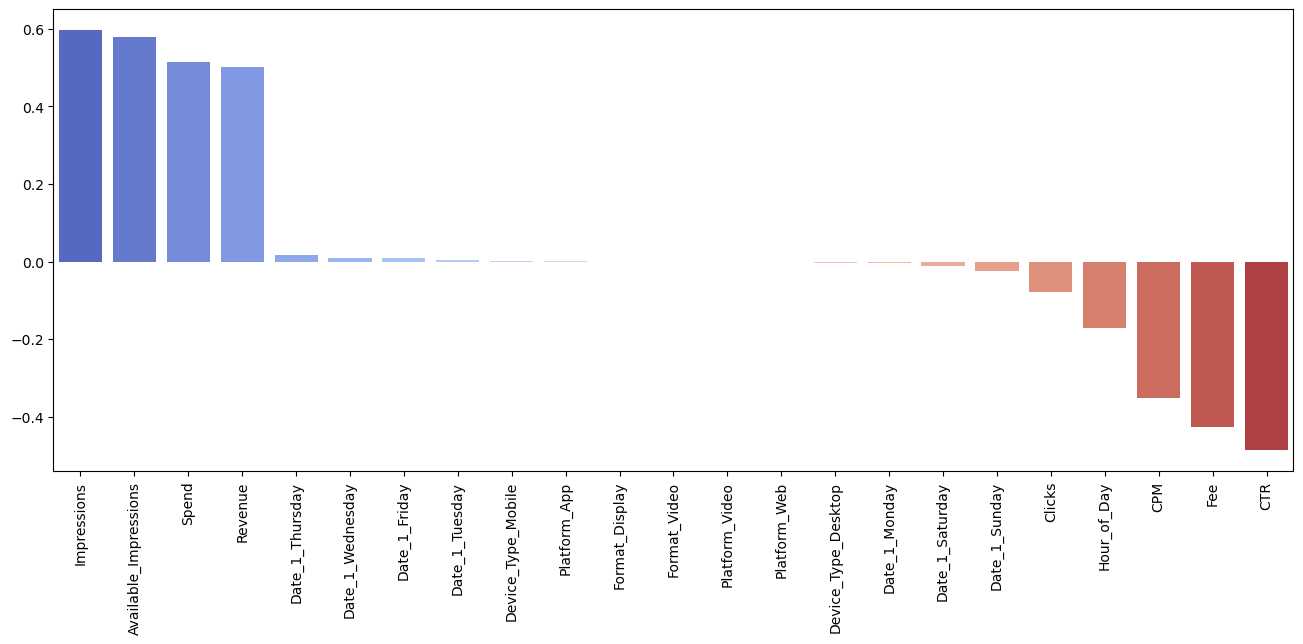

In [12]:
# Criação de dummies e análise de correlação com 'CPC'

dummies = pd.get_dummies(df_2[[ 'Hour_of_Day', 'Date_1',
       'Platform', 'Device_Type', 'Format',
       'Available_Impressions', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']])
teste = dummies.corr()['CPC'].sort_values(ascending=False)[1:]

# Visulização da correlação 

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=teste.index, y=teste.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()

In [ ]:
#visualizando distribuição das variáveis quantitativas - boxplot

# colunas_numericas = df_1_quantitative.columns

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
# for n, variaveis in enumerate(colunas_numericas):
#     sns.boxplot(x=df_1_quantitative[variaveis], ax=axes[n//2, n%2])
#     axes[n//2, n%2].set_title(variaveis)

# plt.tight_layout()
# plt.show()

In [ ]:
# #visualizando distribuição das variáveis quantitativas - Scatter plot

# colunas_numericas = df_1_quantitative.columns

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
# for n, variaveis in enumerate(colunas_numericas):
#     sns.scatterplot(x= df_1["Date"], y=df_1[variaveis], ax=axes[n//2, n%2])
#     axes[n//2, n%2].set_title(variaveis)

# plt.tight_layout()
# plt.show()

In [ ]:
# #visualizando distribuição das variáveis quantitativas - Histogram

# colunas_numericas = df_1_quantitative.columns

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
# for n, variaveis in enumerate(colunas_numericas):
#     sns.histplot(x=df_1[variaveis], ax=axes[n//2, n%2])
#     axes[n//2, n%2].set_title(variaveis)

# plt.tight_layout()
# plt.show()

Standardization/Z-score

In [ ]:
# cols = list(df_1_quantitative.columns)
# cols

In [ ]:
# df_1_quantitative[cols] = df_1_quantitative[cols].apply(zscore)
# df_1_quantitative

"""3 - means that 99.7% of the data is saved 2 - means that 95.44% of the data is saved 1 - means that 68.26% of the data is saved"""

In [ ]:
# outliers_threshold = 1

# selected_dada = df_1_quantitative[cols].abs() <= outliers_threshold

# not_selected_dada = ~(selected_dada)

In [ ]:
# selected_dada

In [ ]:
# not_selected_dada

In [ ]:
# mask = (selected_dada).all(axis=1)
# mask

In [ ]:

# df_1 = df_1[mask]

In [ ]:
# df_1.info()

In [ ]:
# #visualizando distribuição das variáveis quantitativas - boxplot

# colunas_numericas = df_1_quantitative.columns

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
# for n, variaveis in enumerate(colunas_numericas):
#     sns.boxplot(x=df_1[variaveis], ax=axes[n//2, n%2])
#     axes[n//2, n%2].set_title(variaveis)

# plt.tight_layout()
# plt.show()

Collinearity

In [ ]:
# Pearson correlation coefficient
# The range for a correlation coefficient is between -1 and 1
# Typically, we say that two variables are correlated if 
# their correlation coefficient is greater than 0.5, or less than -0.5.
# corr = df_1_quantitative.corr()
# print("Correlation Coefficients")
# print(corr)

In [ ]:
# Spearman's Rank correlation coefficient
# Measures the monotonic relation between a pair of variables
# their correlation coefficient is greater than 0.5, or less than -0.5.

# corr = df_1_quantitative.corr(method="spearman")
# print(corr)

#### Etapa 3. Perguntas de negócio

##### Qual formato teve maior quantidade de clicks?

In [ ]:
# Visualizando as três primeiras linhas

df_2.head()

,Date,Hour_of_Day,Date_1,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
1,2014-09-01,18,Monday,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
2,2014-09-01,17,Monday,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
3,2014-09-01,20,Monday,App,Mobile,Display,2235,345,342,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
4,2014-09-01,22,Monday,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.002817,0.0,0.0,9


In [13]:
# Tabela com o total de Clicks por Format

clicks_por_format = df_2.groupby('Format')['Clicks'].sum().reset_index()

# Ordena o DataFrame por 'Clicks' do maior para o menor

clicks_por_format = clicks_por_format.sort_values(by='Clicks', ascending=False)

print(clicks_por_format)

    Format     Clicks
0  Display  124114357
1    Video  122219068


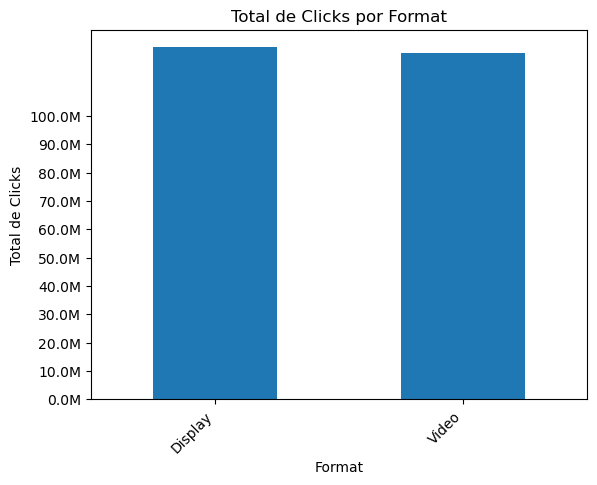

In [ ]:
# Criação do gráfico de barras

ax = clicks_por_format.plot(kind='bar', x='Format', y='Clicks', legend=False,
                             title='Total de Clicks por Format', 
                             xlabel='Format', 
                             ylabel='Total de Clicks')

# Formatação dos números para a casa dos milhões

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/1000000) + "M"))
ax.set_yticks(range(0, 110000000, 10000000))  # Configura os rótulos do eixo y

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# Tabela com o total de Clicks por InventoryType e Format

agg_df = df_2.groupby(['Platform', 'Format'])['Clicks'].sum().unstack(fill_value=0)

# Ordena as colunas por 'Format' do maior para o menor

agg_df = agg_df.sort_values(by='Video', ascending=False)

print(agg_df)

Format     Display     Video
Platform                    
Video     53301301  52861099
Web       44039760  43021132
App       26773296  26336837


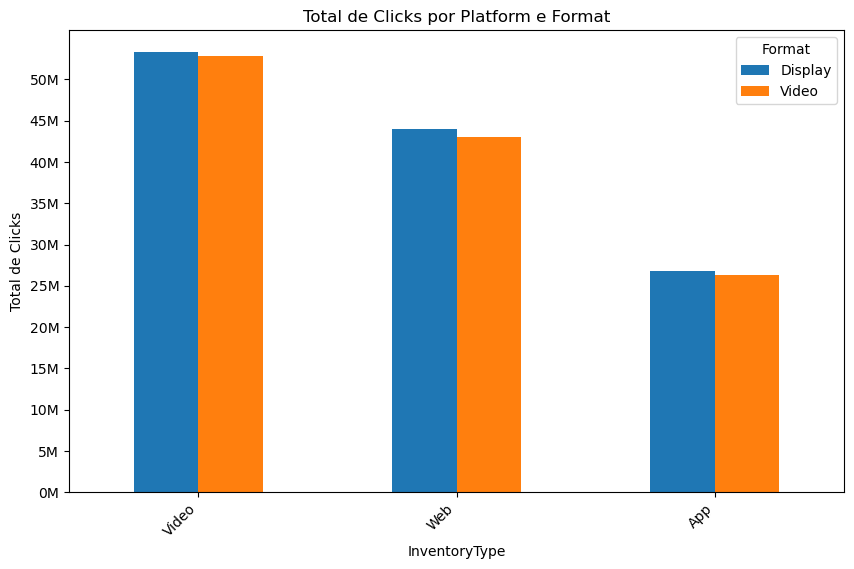

In [ ]:
# Criação do gráfico de barras agrupadas

ax = agg_df.plot(kind='bar', stacked=False, figsize=(10, 6), title='Total de Clicks por Platform e Format', xlabel='InventoryType', ylabel='Total de Clicks')

# Ajuste da escala do eixo y com intervalo de 5M

max_value = agg_df.max().max()
ax.set_yticks(range(0, int(max_value) + 1, 5000000))

# Formatação dos números para a casa dos milhões

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}M".format(x/1000000)))

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

##### Qual plataforma teve mais impressões?

In [ ]:
# Tabela com o total de Impressions por Platform

impressions_por_platform = df_2.groupby('Platform')['Impressions'].sum().reset_index()

# Ordena o DataFrame por 'Impressions' do maior para o menor

impressions_por_platform = impressions_por_platform.sort_values(by='Impressions', ascending=False)

print(impressions_por_platform)

  Platform  Impressions
1    Video  12317620123
2      Web  10269600338
0      App   6061122509


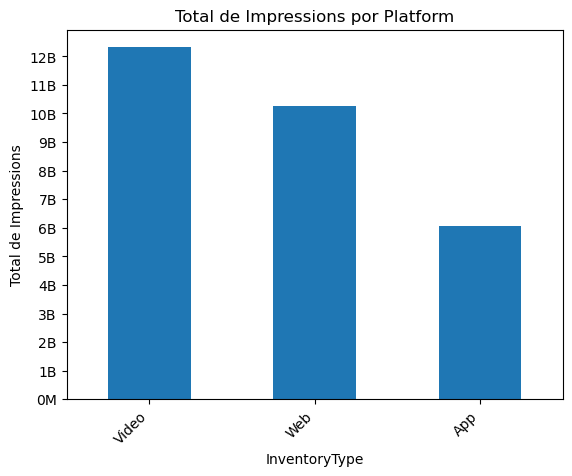

In [ ]:
# Criação do gráfico de barras

ax = impressions_por_platform.plot(kind='bar', x='Platform', y='Impressions', legend=False, title='Total de Impressions por Platform', xlabel='InventoryType', ylabel='Total de Impressions')

# Formatação dos números para a casa dos bilhões

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}B".format(x/1000000000) if x >= 1000000000 else "{:,.0f}M".format(x/1000000)))

# Configuração da escala do eixo y com intervalo de 1

ax.set_yticks(range(0, int(impressions_por_platform['Impressions'].max()) + 1, 1000000000))

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# Tabela com o total de Impressions por InventoryType e Format

agg_df = df_1.groupby(['Platform', 'Format'])['Impressions'].sum().unstack(fill_value=0)

# Ordena as colunas por 'Format' do maior para o menor

agg_df = agg_df.sort_values(by='Video', ascending=False)

print(agg_df)

Format       Display       Video
Platform                        
Video     6158717351  6158902772
Web       5056967558  5212632780
App       3093027763  2968094746


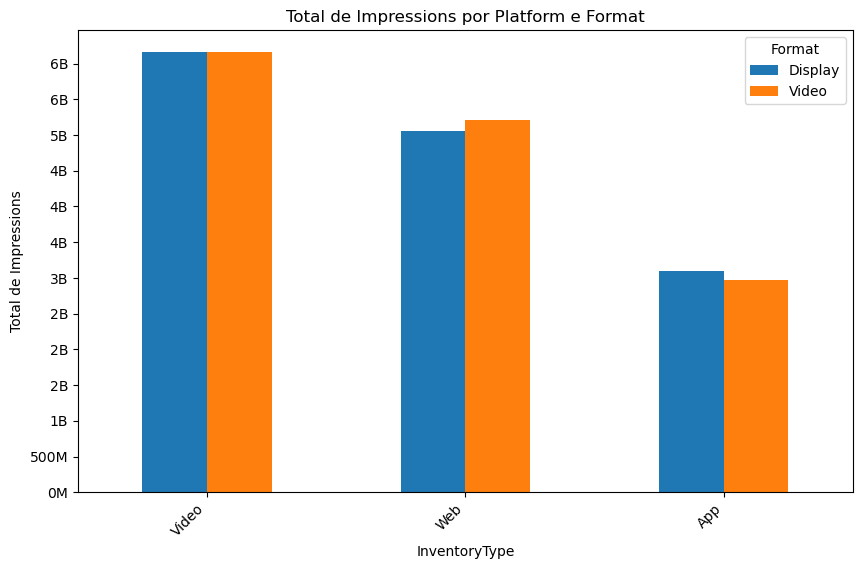

In [ ]:
# Criação do gráfico de barras agrupadas

ax = agg_df.plot(kind='bar', stacked=False, figsize=(10, 6), title='Total de Impressions por Platform e Format', xlabel='InventoryType', ylabel='Total de Impressions')

# Ajuste da escala do eixo y com intervalo de 500M

max_value = agg_df.max().max()
ax.set_yticks(range(0, int(max_value) + 1, 500000000))

# Formatação dos números para a casa dos bilhões

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}B".format(x/1000000000) if x >= 1000000000 else "{:,.0f}M".format(x/1000000)))

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

##### Qual a melhor plataforma em relação ao cpc?

In [ ]:
# Tabela com a média de CPC por plataforma

cpc_por_plataforma = df_2.groupby('Platform')['CPC'].mean().reset_index()

# Ordena o DataFrame por 'CPC' do menor para o maior

cpc_por_plataforma = cpc_por_plataforma.sort_values(by='CPC', ascending=True)

print(cpc_por_plataforma)

  Platform       CPC
2      Web  0.299870
1    Video  0.300119
0      App  0.301653


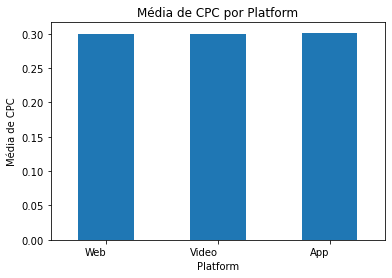

In [ ]:
# Criação do gráfico de barras

ax = cpc_por_plataforma.plot(kind='bar', x='Platform', y='CPC', legend=False,
                          title='Média de CPC por Platform', 
                        
                          ylabel='Média de CPC')

# Inclinação da legenda do eixo x

plt.xticks(rotation=360, ha='right')

plt.show()

##### Qual o melhor formato em relação ao CPC?


In [ ]:
# Tabela com a média de CPC por Format

cpc_por_formato = df_2.groupby('Format')['CPC'].mean().reset_index()

# Ordena o DataFrame por 'CPC' do menor para o maior

cpc_por_formato = cpc_por_formato.sort_values(by='CPC', ascending=True)

print(cpc_por_formato)

    Format       CPC
1    Video  0.300350
0  Display  0.300367


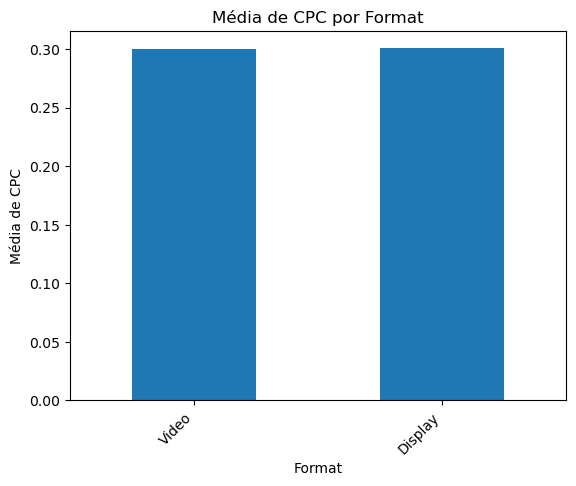

In [ ]:
# Criação do gráfico de barras

ax = cpc_por_formato.plot(kind='bar', x='Format', y='CPC', legend=False,
                          title='Média de CPC por Format', 
                          xlabel='Format', 
                          ylabel='Média de CPC')

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

##### Qual o melhor dia da semana em relação ao cpc??

In [ ]:
# Tabela com a média de CPC por dia da semana

cpc_dia_semana = df_2.groupby('Date_1')['CPC'].mean().reset_index()

# Ordena o DataFrame por 'CPC' do menor para o maior

cpc_dia_semana = cpc_dia_semana.sort_values(by='CPC', ascending=True)

print(cpc_dia_semana)


      Date_1       CPC
3     Sunday  0.280484
2   Saturday  0.290920
1     Monday  0.297293
5    Tuesday  0.302901
0     Friday  0.307044
6  Wednesday  0.308562
4   Thursday  0.315446


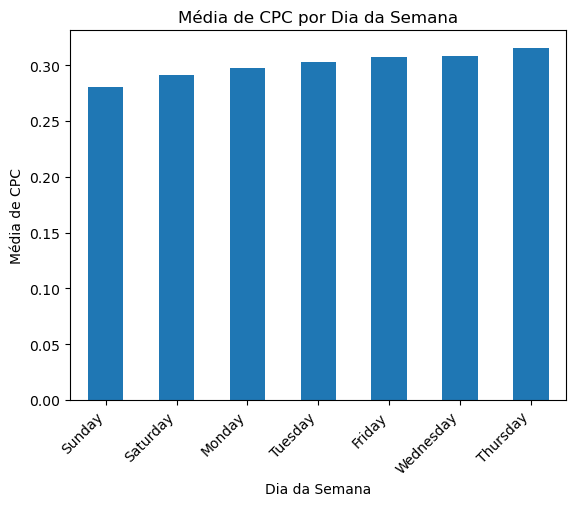

In [ ]:
# Criação do gráfico de barras

ax = cpc_dia_semana.plot(kind='bar', x='Date_1', y='CPC', legend=False,
                             title='Média de CPC por Dia da Semana', 
                             xlabel='Dia da Semana', 
                             ylabel='Média de CPC')

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

##### Qual o melhor horário em relação ao CPC?

In [ ]:
# Tabela com a média de CPC para cada horário do dia

cpc_horario = df_2.groupby('Hour_of_Day')['CPC'].mean().reset_index()

# Ordena as horas do dia em relação ao menor CPC
cpc_horario = cpc_horario.sort_values(by='CPC', ascending=True)

print(cpc_horario)


    Hour_of_Day       CPC
23           23  0.214623
22           22  0.215684
21           21  0.219809
20           20  0.228874
19           19  0.235765
18           18  0.245394
17           17  0.246799
16           16  0.248896
15           15  0.261486
14           14  0.265565
13           13  0.275647
12           12  0.282929
11           11  0.295956
10           10  0.304785
9             9  0.320886
0             0  0.339872
8             8  0.343402
1             1  0.348088
2             2  0.366483
7             7  0.375911
6             6  0.386789
4             4  0.395025
3             3  0.402024
5             5  0.404789


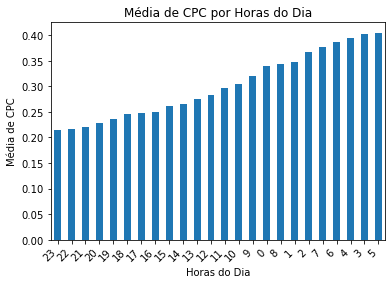

In [ ]:
# Criação do gráfico de barras

ax = cpc_horario.plot(kind='bar', x='Hour_of_Day', y='CPC', legend=False,
                             title='Média de CPC por Horas do Dia', 
                             xlabel='Horas do Dia', 
                             ylabel='Média de CPC')

# Inclinação da legenda do eixo x

plt.xticks(rotation=45, ha='right')

plt.show()

##### Qual foi a variação do custo por click?

In [ ]:
# Calcula a variação do CPC
cpc_variacao = df_2['CPC'].diff()

# Substitui por zero o valor Nan da primeira linha do dataframe
cpc_variacao.iloc[0] = 0

print(cpc_variacao)


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
25853    0.108736
25854    0.000079
25855    0.108581
25856    0.014126
25857    0.006240
Name: CPC, Length: 25858, dtype: float64


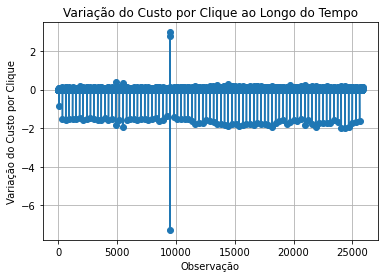

In [ ]:
# Plota o gráfico de linha com a variacao do CPC

plt.plot(cpc_variacao.index, cpc_variacao, marker='o')
plt.xlabel('Observação')
plt.ylabel('Variação do Custo por Clique')
plt.title('Variação do Custo por Clique ao Longo do Tempo')
plt.grid(True)
plt.show()


In [ ]:
# Calcula o desvio padrão do CPC

cpc_desvio_padrao = df_2['CPC'].std()

print(cpc_desvio_padrao)

0.33883054309121696


##### Qual horário tem maior disponibilidade e menor custo?

In [ ]:
# Encontrar o horário com a maior disponibilidade
max_disponibilidade = df_2.loc[df_2['Available_Impressions'].idxmax()]['Hour_of_Day']

# Encontrar o horário com o menor custo
min_custo = df_2.loc[df_2['CPC'].idxmin()]['Hour_of_Day']

print(f"Horário com maior disponibilidade: {max_disponibilidade}")
print(f"Horário com menor custo: {min_custo}")


Horário com maior disponibilidade: 16
Horário com menor custo: 23


In [ ]:

# Classificar os dados com base na disponibilidade (decrescente) e no custo (crescente)
data_sorted = df_2.sort_values(by=['Available_Impressions', 'CPC'], ascending=[False, True])

# Selecionar a primeira linha
melhor_horario = data_sorted.iloc[0]

# Obter o horário
horario_maior_disponibilidade_menor_custo = melhor_horario['Hour_of_Day']

print("Horário com a maior disponibilidade e o menor custo:", horario_maior_disponibilidade_menor_custo)


NameError: name 'df_2' is not defined

##### Qual melhor horário em relação ao cpc/clicks?

In [14]:
clicks_per_hour = df_1.groupby(['Hour_of_Day','Platform'])['Clicks'].sum().unstack(fill_value=0)
clicks_per_hour

Platform,App,Video,Web
Hour_of_Day,,,
0,1956627,3794003,2830856
1,1363121,1884307,2072333
2,607917,1390245,1266164
3,485773,932826,760222
4,340612,703402,529555
5,301010,705547,631533
6,925616,1444685,1131142
7,1472527,2872729,2339344
8,1756887,3723962,3082501


[]

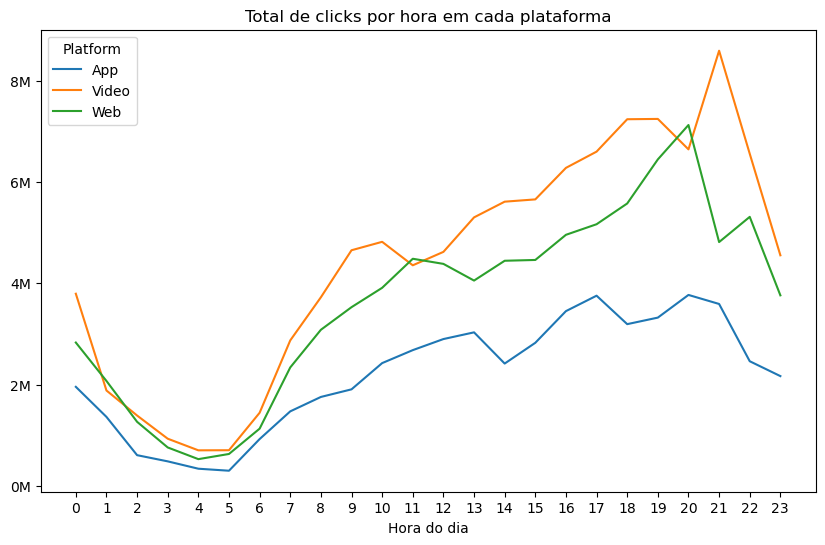

In [16]:
ax = clicks_per_hour.plot(figsize=(10, 6), title='Total de clicks por hora em cada plataforma')
plt.xticks(range(0, 24), rotation=0)
plt.xlabel('Hora do dia')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*1e-6) + 'M'))
plt.plot()

In [25]:
cpc_per_hour = df_1.groupby(['Hour_of_Day','Platform'])['CPC'].mean().unstack(fill_value=0)

[]

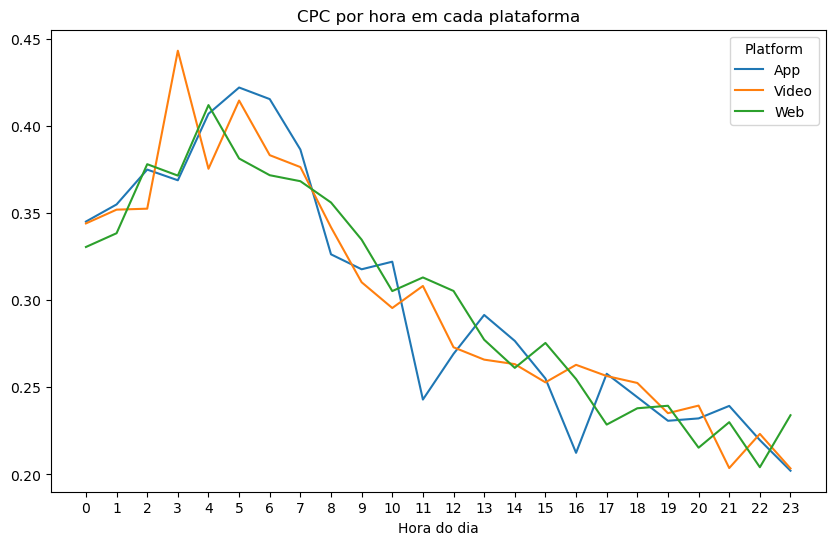

In [26]:
ax = cpc_per_hour.plot(figsize=(10, 6), title='CPC por hora em cada plataforma')
plt.xticks(range(0, 24), rotation=0)
plt.xlabel('Hora do dia')
plt.plot()

##### Qual o melhor dia da semana em relação aos Clicks?

In [27]:
clicks_per_day = df_1.groupby('Date_1')['Clicks'].sum()
clicks_per_day

Date_1
Friday       34525793
Monday       35530967
Saturday     36543685
Sunday       37031341
Thursday     34093084
Tuesday      34464456
Wednesday    34144099
Name: Clicks, dtype: int64

[]

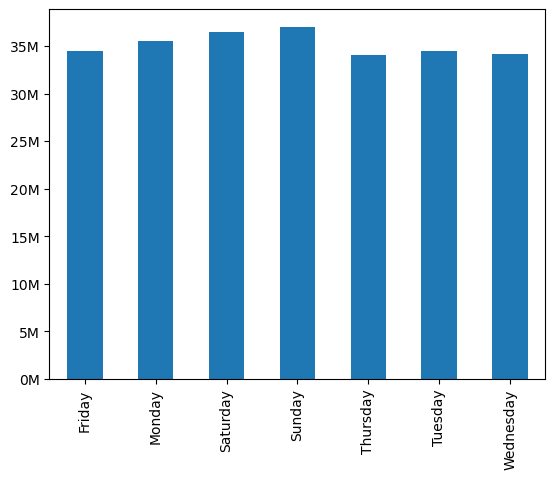

In [28]:
ax = clicks_per_day.plot(kind='bar')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*1e-6) + 'M'))
ax.set_xlabel('')
plt.plot()